# Overview

This tutorial shows how to load images into napari, perform instance segmentation and then measure the morpholical properties of the segmented objects. We will be segmenting mitochondria in HeLa cells imaged image FIBSEM. We will them measure some morpholical properties of the segmented nuclei and interactively explore the measurements. Finally, we will generate a surface mesh to measure the surface propreties of one of the mitochondria.

## Dependencies
- segmentation: empanada-napari
- measurement: napari-clusters-plotter
- plotting: matplotlib


## Data source

The image is a FIBSEM image of a HeLa cell that was originally downloaded from the [empanada-napari 3D segmentation tutorial](https://empanada.readthedocs.io/en/latest/plugin/tutorials.html#inference-on-volumetric-data)

## launching the napari viewer

We will be using [napari](https://napari.org/stable/) to view and interact with our images. napari is a GPU-accelerated multidimensional image viewer that is written in python. napari can communicate bidirectionally with the python interpreter so we can both send data to the viewer and retrieve annotations and measurements we make from the viewer. For an introduction to napari, please see [this tutorial](https://alisterburt.github.io/napari-workshops/SciPy-0722/intro.html).

To launch the viewer, run the command below. Upon successful launch, you should see the empty viewer below. Note that the first time you launch the napari viewer, it takes a few moments to launch.

<img src="./images/empty_viewer.png" alt="empty napari viewer"  width="80%">

In [4]:
import napari

viewer = napari.Viewer()

## Open the empanada-napari plugin

We will use the `empanada-napari` plugin to perform instance segmentation of mitochondria in a HeLa cell. To open the plugin, go to the following menu entry: `Plugins -> empanada-napari -> 3D inference`. The plugin will take a few moments to launch the first time you open it.

Once the plugin opens, you should see the plugin interface in your viewer.

<img src="./images/empanada_volume_segmentation.png" alt="empanada-napari plugin"  width="80%">

## load an image

Load the FEBSIM image using the command below. Note that the image is just a 3D numpy array.

In [2]:
from skimage.io import imread

# load the image as a numpy array
hela_cells = imread("../data/hela_cell_em.tif")

# the image is just a numpy array
image_type = type(hela_cells)
image_shape = hela_cells.shape

print(f"the image is a {image_type} with shape: {image_shape}")

the image is a <class 'numpy.ndarray'> with shape: (256, 256, 256)


## add the image to the viewer

Next, we add the image to the napari viewer so that we can analyze it. When you add the image, you should see it appear in the viewer as a new image layer called `hela_cells` (see the screenshot below).

In [5]:
raw_image_layer = viewer.add_image(hela_cells)

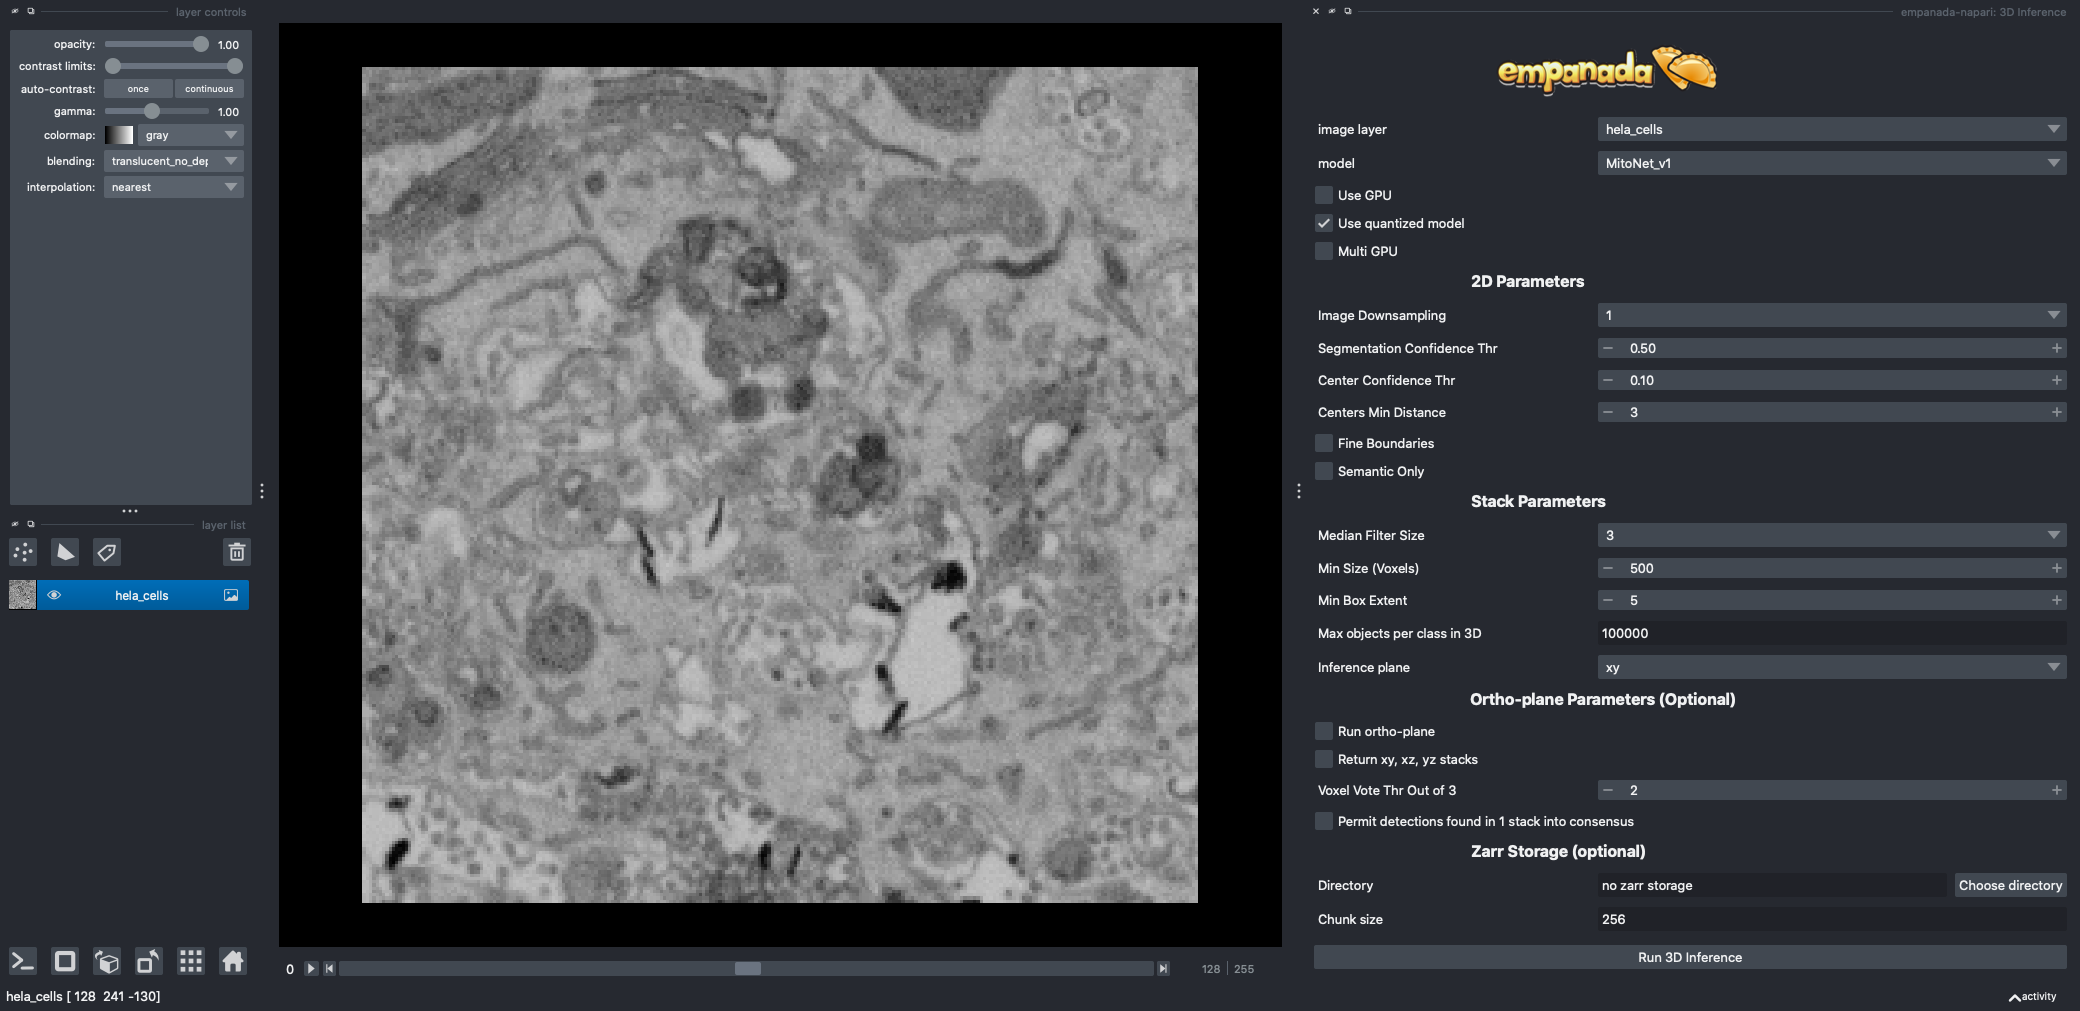

In [9]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

## segment the mitochondria

We will use the empanada-napari MitoNet model to segment the mitochondria. For the purpose of the exercise, we will use the default parameters (explained below). Please see the [empanada-napari documentation](https://empanada.readthedocs.io/en/latest/plugin/modules.html#d-inference) for more details on the parameters.

_**General parameters**_

- **image layer**: "hela_cells" (this is the image layer we just added)
- **model**: "MitoNet_v1"
- **Use GPU**: False (i.e., not checked). 
- **Use quantized model**: True
- **Multi GPU**: False

_**2D Parameters**_

- **Image downsamplin**g: 1
- **Segmentation Confidence Thr**: 0.5
- **Center Confidence Thr**: 0.10
- **Centers Min Distance**: 3
- **Fine boundaries**: False
- **Semantic Only**: False

_**Stack Parameters**_

- **Median Filter Size**: 3
- **Min Size (Voxels)**: 500
- **Min Box Extent**: 5
- **Max objets per class in 3D**: 100000
- **Inference plane**: XY

_**Ortho-plane Parameters**_

- **Run ortho-plane**: False
- **Return xy, xz, yz stacks**: False
- **Voxel Vote Thr out of 3**: 2
- **Permit detections found in 1 stack into consensus**: False

_**Zarr Storage**_

- **Directory**: leave blank.
- **Chunk size**: 256

Once you have verified the parameters, press the "Run 3D Inference" button. Generally, segmentation will take ~3 minutes on a standard laptop.

<img src="./images/empanada_segmentation_run.png" alt="click Run 3D Intference to start segmentation"  width="80%">


When segmentation has completed, the results will be added as a Labels layer.

<img src="./images/empanada_segmentation_2d.png" alt="mitochondria segmentation in 2D"  width="80%">

Now that we are done segmenting the mitochondria, you can hide the empanada-napari widget by clicking the "x" in the upper right hand corner of the widget.

<img src="./images/hide_empanada.png" alt="mitochondria segmentation in 2D"  width="80%">

## explore the segmentation in 2D

You can view the segmentation in 2D by scrolling through the Z slices using the slider at the bottom.

It can be easier to proof read the segmentations by just viewing the outlines (contours) of each instance. To turn on the segmentation outlines:

1. Select the segmentation layer in the layer list

<img src="./images/empanada_segmentation_axis.png" alt="scroll through z axis"  width="80%">

2. Set the contour value to a number greater than 0 (e.g., 3)

<img src="./images/empanada_segmentation_2d_contour.png" alt="view the countours of the labels"  width="80%">

## view the segmentation in 3D

We can also view the segmentation and image in 3D. For cryoem images, where the contrast is usually low intensity values on higher intensity background, we often use a minimum intensity projection or `minip` to visualize the 3D volume.

1. Click the 3D rendering button.

<img src="./images/empanada_segmentation_2d_to_3d.png" alt="3D rendering"  width="80%">

2. Select the `hela_cells` image layer.

<img src="./images/empanada_segmentation_select_image.png" alt="select image layer"  width="80%">

3. Select "minip" from the rendering dropdown menu.

<img src="./images/empananda_segmentation_minip.png" alt="minimum intensity projection"  width="80%">

## measuring morphological properties of the mitochondria

Next, we will measure some morphological properties of the mitochondria. To do so, we will use the `napari-clusters-plotter` plugin. First, we will open the measurement tool from the Plugins menu: `Tools -> Measurement tables -> Regionprops (scikit-image, nsr)`. Please note that the `Tools` menu will be deprecated in future versions of napari and plugins will be found in the `Plugins` menu.

1. To make the measurement, we choose the following settings and press the "Run" button.

- **Image layer**: hela_cells
- **Labels layer**: hela_cells-mito-prediction
- **Measurements**: Select the `intensity` and `shape` checkboxes. We will measure features relating to the intensity and shape of the mitochondria.

<img src="./images/measurement_widget.png" alt="minimum intensity projection"  width="80%">

2. When the measurements have completed, they will be displayed in a table below the measurement widget.

<img src="./images/measurement_results.png" alt="measurement table"  width="80%">

3. You can hide the measurement widget by clicking the "x" in the upper left hand corner of the widget.

## dimensionality reduction of morphometric information

To explore our morphometric data, we will use UMAP to reduce the data to 2D. To do so, we will use the napari-clusters-plotter plugin.

1. Open the "Dimensionality Reduction Widget" from: `Plugins -> napari-clusters-plotter -> Dimensionality Reduction Widget`.

<img src="./images/dimensionality_reduction_widget.png" alt="minimum intensity projection"  width="80%">

2. Verify the `hela_cells-mito-prediction` layer is selected for the Labels layer.

<img src="./images/dimensionality_reduction_widget_layer.png" alt="dimensionality reduction layer selection"  width="80%">

3. Set the "Dimensionality Reduction Algorithm" to "UMAP".
    - Number of neighbors: 10
    - Standardize features: True
    
<img src="./images/dimensionality_reduction_widget_algorithm.png" alt="dimensionality reduction algorithm selection"  width="80%">
    
4. Select all of the measurements to include with shift + left click. If you do not see any measurements, click the "Update Measurements" button.

<img src="./images/dimensionality_reduction_widget_measurement.png" alt="dimensionality reduction measurements"  width="80%">

5. Click the Run button. The blue animated square in the lower right hand corner of the viewer will disapear when dimensionality reduction has completed. Typically this copmletes in less than 1 minute.

<img src="./images/dimensionality_reduction_widget_run.png" alt="dimensionality reduction run"  width="80%">

6. Click the "x" in the upper right hand corner of the "Dimensionality Reduction Widget" to hide it after clustering has completed.

## explore morphological features

To see how the detected mitochondria vary, we will plot the low-dimensional representation of the features and see which phenotypes the different clusters correlate with. To do so, we will use the `napari-clusters-plotter` "Plotter Widget".

1. Open the `napari-clusters-plotter` "Plotter Widget" from the "Plugins" menu: `Plugins -> napari-clusters-plotter -> Plotter Widget`

2. Verify the hela_cells-mito-prediction layer is selected for the Labels layer.
3. Set the Axes of the plot to "UMAP_0" and "UMAP_1". If the axes are not available, click the "Update Measurements" button.
4. Click the "Run" button to generate the plot.
5. Click the "Toggle ndisplay" button to render your data in 3D.
6. Click the "eye" button on the `hela_cells-mito-prediction` layer to hide the mitochondria segmentation.
7. Select a group of segmentations from the plot by drawing a circle around them. You can draw the circle by clicking and dragging on the plot. You will see a new layer added called `cluster_ids_in_space` which has your segmentations colored such that the mitochondria you selected in the plot are colored blue and the others are colored orange.
8. Try selecting differnt groups of cells from the plot. Explore the different groups and see how the shapes vary between them.

## accessing the measurements from the notebook

You can also directly access the measurements you made from the notebook.

In [4]:
viewer.layers["hela_cells-mito-prediction"].features


,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,extent,local_centroid-0,...,solidity,feret_diameter_max,standard_deviation_intensity,minor_axis_length,intermediate_axis_length,major_axis_length,index,UMAP_0,UMAP_1,MANUAL_CLUSTER_ID
0,1,5614,32448,22.050812,10669,163.0,99.630210,45.0,0.173015,18.565550,...,0.526197,57.419509,12.811716,14.327099,23.228903,63.058589,1,9.970068,8.496016,0
1,2,4972,10879,21.176012,6996,162.0,109.663516,62.0,0.457027,6.021521,...,0.710692,44.158804,14.440518,14.283148,22.398213,43.859969,2,11.488399,9.115196,0
2,3,7511,22464,24.297768,10215,153.0,118.546132,80.0,0.334357,18.175210,...,0.735291,39.572718,9.475064,17.647772,23.462498,41.107982,3,9.793795,10.023988,0
3,4,8312,27440,25.132497,11248,130.0,94.476781,46.0,0.302915,13.722690,...,0.738976,41.060930,12.302851,19.636556,23.534020,41.006680,4,11.960374,9.849500,0
4,5,919,2160,12.062545,1107,146.0,107.261153,73.0,0.425463,3.670294,...,0.830172,19.949937,10.272528,7.507344,12.735987,19.700596,5,13.366754,12.040498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1981,3888,15.582194,2404,179.0,127.444220,85.0,0.509516,2.320545,...,0.824043,28.792360,13.495771,6.993110,20.230891,29.902535,107,11.042100,12.885542,0
107,108,1026,1680,12.513619,1126,155.0,118.744639,86.0,0.610714,2.704678,...,0.911190,17.804494,12.813138,8.383400,14.474022,17.103872,108,11.275807,13.218362,0
108,109,1721,2700,14.868281,1869,168.0,117.780941,48.0,0.637407,2.408483,...,0.920813,25.337719,13.272726,7.525021,18.899999,24.754772,109,13.092489,12.254585,0
109,110,1780,3864,15.036282,2108,151.0,113.434270,75.0,0.460663,1.826966,...,0.844402,31.400637,11.178363,6.745875,19.499048,29.861683,110,12.466605,12.596238,0
